In [1]:
import logging
import os
import math
import multiprocessing
import statistics
from itertools import combinations

from scipy.stats import t
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import natsort

In [2]:
df = pd.read_csv("/hdd/results-analysis/data/parsed_data/non-periodic/nonPeriodic-3GPP-012vpm-oneShot-10pc-2020-10-28-21_08_22/run-5.csv")

In [3]:
df.head()

,NodeID,Time,cbr,cbrPscch,generatedGrants,grantBreak,grantBreakMissedTrans,grantBreakSize,grantBreakTiming,grantStartTime,...,tbFailedButSCIReceived,tbFailedDueToInterference,tbFailedDueToNoSCI,tbFailedDueToProp,tbFailedHalfDuplex,tbReceived,tbSent,txRxDistanceOneShot,txRxDistanceSCI,txRxDistanceTB
0,0,500.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,500.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,500.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,500.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,500.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df[df["periodic"]]

SyntaxError: unexpected EOF while parsing (<ipython-input-4-496ffac79bc4>, line 1)

In [ ]:
df.columns

In [ ]:
df[df["cbr"] > -1]

In [ ]:
df = df[
    [
        "NodeID", "Time", 'subchannelReceived', "oneShot",
        'sciDecoded', 'sciFailedDueToInterference', 'sciFailedDueToProp',
        'sciFailedHalfDuplex', 'sciReceived', 'sciSent', 'sciUnsensed',
        'tbDecoded', 'tbFailedButSCIReceived','tbFailedDueToInterference',
        'senderID',
        'tbFailedDueToNoSCI', 'tbFailedDueToProp','tbFailedHalfDuplex',
        'tbReceived', 'tbSent', 'txRxDistanceSCI','txRxDistanceTB'
    ]
]

In [51]:
df[(df["NodeID"] == 0) & (df["sciReceived"] == 1)]

,NodeID,Time,subchannelReceived,oneShot,sciDecoded,sciFailedDueToInterference,sciFailedDueToProp,sciFailedHalfDuplex,sciReceived,sciSent,...,tbFailedButSCIReceived,tbFailedDueToInterference,senderID,tbFailedDueToNoSCI,tbFailedDueToProp,tbFailedHalfDuplex,tbReceived,tbSent,txRxDistanceSCI,txRxDistanceTB
18461,0,500.076,2.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,...,0.0,0.0,1052.0,0.0,0.0,0.0,1.0,NaN,409.956575,409.956575
19836,0,500.081,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,...,0.0,0.0,1178.0,0.0,0.0,0.0,1.0,NaN,479.026432,479.026432
20165,0,500.082,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,...,0.0,0.0,1083.0,0.0,0.0,0.0,1.0,NaN,295.261830,295.261830
20166,0,500.082,2.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,...,0.0,0.0,1083.0,1.0,0.0,0.0,1.0,NaN,946.370094,946.370094
21414,0,500.085,2.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,...,0.0,0.0,1153.0,1.0,0.0,0.0,1.0,NaN,1161.737878,1161.737878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8310098,0,511.996,2.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,...,0.0,0.0,1092.0,1.0,0.0,0.0,1.0,NaN,1024.128605,290.172300
8310099,0,511.996,1.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,...,0.0,0.0,1092.0,1.0,0.0,0.0,1.0,NaN,290.172300,641.271428
8310100,0,511.996,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,...,NaN,NaN,1227.0,NaN,NaN,NaN,NaN,NaN,641.271428,NaN
8312068,0,511.998,2.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,...,0.0,0.0,1045.0,0.0,0.0,0.0,1.0,NaN,112.129843,112.129843


In [52]:
sci_info = df[
    [
        "NodeID", "Time", "subchannelReceived", "senderID", "oneShot", "sciDecoded",'sciFailedDueToInterference', 
        'sciFailedDueToProp', 'sciFailedHalfDuplex', 'sciReceived', 'sciSent', 'sciUnsensed', "txRxDistanceSCI" 
    ]
]

In [5]:
tb_info = df[
    [
       "NodeID", "Time", "senderID", "periodic", 'tbDecoded', 'tbFailedButSCIReceived',
       'tbFailedDueToInterference', 'tbFailedDueToNoSCI', 'tbFailedDueToProp',
       'tbFailedHalfDuplex', 'tbReceived', 'tbSent', "txRxDistanceTB" 
    ]
]

In [6]:
tb_info["periodic"].unique()

array([nan, -1.,  0.])

In [14]:
tb_info[tb_info["periodic"] > -2]

,NodeID,Time,senderID,periodic,tbDecoded,tbFailedButSCIReceived,tbFailedDueToInterference,tbFailedDueToNoSCI,tbFailedDueToProp,tbFailedHalfDuplex,tbReceived,tbSent,txRxDistanceTB
18451,0,500.076,1140.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,987.483722
18452,1,500.076,1140.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,1144.576375
18453,2,500.076,1140.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,1238.102444
18454,3,500.076,1140.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,1199.876867
18455,4,500.076,1140.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,1161.577891
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6715935,244,512.000,1260.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,628.839262
6715936,244,512.000,1091.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,911.129117
6715937,245,512.000,1163.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,34.885332
6715938,245,512.000,1260.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,618.520541


In [54]:
sci_info.head()

,NodeID,Time,subchannelReceived,senderID,oneShot,sciDecoded,sciFailedDueToInterference,sciFailedDueToProp,sciFailedHalfDuplex,sciReceived,sciSent,sciUnsensed,txRxDistanceSCI
0,0,500.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,500.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,500.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,500.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,500.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
sci_info["subchannelReceived"].mean()

0.9974930287932784

In [56]:
sci_info["subchannelReceived"].count()

5069065

In [24]:
sci_info["subchannelReceived"].std()

0.7716567570136541

In [14]:
sci_info["Time"].max()

512.0

In [15]:
oneShot_only = sci_info[sci_info["oneShot"] == 1]
sci_only = sci_info[sci_info["oneShot"] == 0] 

In [16]:
sci_only = sci_only[(sci_only["NodeID"] == 0) & (sci_only["txRxDistanceSCI"] < 500)]

In [17]:
group_sci = sci_only.groupby(["Time", "subchannelReceived"]).agg("count")

In [18]:
colliding_scis =  group_sci[group_sci["NodeID"] > 1]

In [92]:
colliding_scis.sum()

NodeID                        3539
senderID                      3539
oneShot                       3539
sciDecoded                    3539
sciFailedDueToInterference    3539
sciFailedDueToProp            3539
sciFailedHalfDuplex           3539
sciReceived                   3539
sciSent                          8
sciUnsensed                   3539
txRxDistanceSCI               3539
dtype: int64

In [93]:
group_sci["NodeID"].max()

4

In [94]:
group_sci[group_sci["NodeID"] == 2]

,,NodeID,senderID,oneShot,sciDecoded,sciFailedDueToInterference,sciFailedDueToProp,sciFailedHalfDuplex,sciReceived,sciSent,sciUnsensed,txRxDistanceSCI
Time,subchannelReceived,,,,,,,,,,,
500.399,2.0,2,2,2,2,2,2,2,2,0,2,2
500.499,2.0,2,2,2,2,2,2,2,2,0,2,2
500.515,1.0,2,2,2,2,2,2,2,2,0,2,2
500.552,0.0,2,2,2,2,2,2,2,2,0,2,2
500.615,1.0,2,2,2,2,2,2,2,2,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
511.979,0.0,2,2,2,2,2,2,2,2,1,2,2
511.981,1.0,2,2,2,2,2,2,2,2,0,2,2
511.983,1.0,2,2,2,2,2,2,2,2,0,2,2


In [59]:
oneShot_only = oneShot_only[(oneShot_only["NodeID"] == 0) & (oneShot_only["txRxDistanceSCI"] < 500)]

In [60]:
groupOneShot = oneShot_only.groupby(["Time", "subchannelReceived"]).agg("count")

In [61]:
groupOneShot["NodeID"].max()

4

In [62]:
groupOneShot[groupOneShot["NodeID"] == 5]

,,NodeID,senderID,oneShot,sciDecoded,sciFailedDueToInterference,sciFailedDueToProp,sciFailedHalfDuplex,sciReceived,sciSent,sciUnsensed,txRxDistanceSCI
Time,subchannelReceived,,,,,,,,,,,


In [63]:
collidingOneShots = groupOneShot[groupOneShot["NodeID"] > 1]

In [64]:
groupOneShot[groupOneShot["NodeID"] == 5]

,,NodeID,senderID,oneShot,sciDecoded,sciFailedDueToInterference,sciFailedDueToProp,sciFailedHalfDuplex,sciReceived,sciSent,sciUnsensed,txRxDistanceSCI
Time,subchannelReceived,,,,,,,,,,,


In [65]:
collidingOneShots.sum()

NodeID                        851
senderID                      851
oneShot                       851
sciDecoded                    851
sciFailedDueToInterference    851
sciFailedDueToProp            851
sciFailedHalfDuplex           851
sciReceived                   851
sciSent                         0
sciUnsensed                   851
txRxDistanceSCI               851
dtype: int64

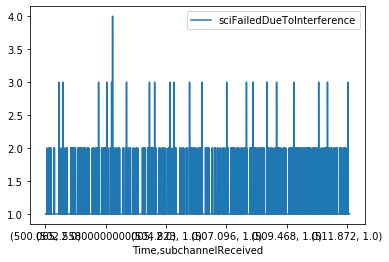

In [66]:
groupOneShot.plot(y="sciFailedDueToInterference")

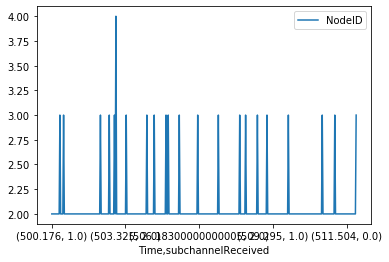

In [67]:
collidingOneShots.plot(y="NodeID")

In [68]:
both_collide = pd.merge(group_sci, groupOneShot, on=["Time", "subchannelReceived"])

In [69]:
both_collide.shape

(259, 22)

In [70]:
both_collide.sum()

NodeID_x                        260
senderID_x                      260
oneShot_x                       260
sciDecoded_x                    260
sciFailedDueToInterference_x    260
sciFailedDueToProp_x            260
sciFailedHalfDuplex_x           260
sciReceived_x                   260
sciSent_x                         0
sciUnsensed_x                   260
txRxDistanceSCI_x               260
NodeID_y                        270
senderID_y                      270
oneShot_y                       270
sciDecoded_y                    270
sciFailedDueToInterference_y    270
sciFailedDueToProp_y            270
sciFailedHalfDuplex_y           270
sciReceived_y                   270
sciSent_y                         0
sciUnsensed_y                   270
txRxDistanceSCI_y               270
dtype: int64

In [71]:
both_collide[both_collide["NodeID_x"] == 3]

,,NodeID_x,senderID_x,oneShot_x,sciDecoded_x,sciFailedDueToInterference_x,sciFailedDueToProp_x,sciFailedHalfDuplex_x,sciReceived_x,sciSent_x,sciUnsensed_x,...,senderID_y,oneShot_y,sciDecoded_y,sciFailedDueToInterference_y,sciFailedDueToProp_y,sciFailedHalfDuplex_y,sciReceived_y,sciSent_y,sciUnsensed_y,txRxDistanceSCI_y
Time,subchannelReceived,,,,,,,,,,,,,,,,,,,,,


In [72]:
both_collide[both_collide["NodeID_y"] == 3]

,,NodeID_x,senderID_x,oneShot_x,sciDecoded_x,sciFailedDueToInterference_x,sciFailedDueToProp_x,sciFailedHalfDuplex_x,sciReceived_x,sciSent_x,sciUnsensed_x,...,senderID_y,oneShot_y,sciDecoded_y,sciFailedDueToInterference_y,sciFailedDueToProp_y,sciFailedHalfDuplex_y,sciReceived_y,sciSent_y,sciUnsensed_y,txRxDistanceSCI_y
Time,subchannelReceived,,,,,,,,,,,,,,,,,,,,,


In [73]:
sci_only[sci_only["Time"] == 500.254]

,NodeID,Time,subchannelReceived,senderID,oneShot,sciDecoded,sciFailedDueToInterference,sciFailedDueToProp,sciFailedHalfDuplex,sciReceived,sciSent,sciUnsensed,txRxDistanceSCI


In [74]:
oneShot_only[oneShot_only["Time"] == 500.254]

,NodeID,Time,subchannelReceived,senderID,oneShot,sciDecoded,sciFailedDueToInterference,sciFailedDueToProp,sciFailedHalfDuplex,sciReceived,sciSent,sciUnsensed,txRxDistanceSCI


In [75]:
oneShot_only[(oneShot_only["Time"] >= 501.325) & (oneShot_only["Time"] <= 501.350)].count()

NodeID                        12
Time                          12
subchannelReceived            12
senderID                      12
oneShot                       12
sciDecoded                    12
sciFailedDueToInterference    12
sciFailedDueToProp            12
sciFailedHalfDuplex           12
sciReceived                   12
sciSent                        0
sciUnsensed                   12
txRxDistanceSCI               12
dtype: int64

In [76]:
oneShot_only[(oneShot_only["Time"] >= 501.325) & (oneShot_only["Time"] < 501.350)]

,NodeID,Time,subchannelReceived,senderID,oneShot,sciDecoded,sciFailedDueToInterference,sciFailedDueToProp,sciFailedHalfDuplex,sciReceived,sciSent,sciUnsensed,txRxDistanceSCI
639115,0,501.326,1.0,1265.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,0.0,41.086578
639117,0,501.326,2.0,1252.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,0.0,416.837691
640742,0,501.327,2.0,1100.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,490.813502
641718,0,501.329,0.0,1082.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,0.0,59.066875
643187,0,501.331,0.0,1063.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,0.0,384.622806
643188,0,501.331,2.0,1027.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,0.0,289.837670
643899,0,501.333,2.0,1095.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,0.0,326.263615
645112,0,501.335,0.0,1103.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,0.0,285.290311
645642,0,501.336,0.0,1086.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,0.0,182.406838
647257,0,501.339,2.0,1105.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,0.0,256.162077


- 22 one shots
- 3 collisions
- 25 * 3 = 75 possible
- 12% collisions
- Should be around 3% collisions 


In [34]:
tb_info[(tb_info["tbFailedDueToInterference"] == 1) & (tb_info["NodeID"] == 0)]

,NodeID,Time,senderID,tbDecoded,tbFailedButSCIReceived,tbFailedDueToInterference,tbFailedDueToNoSCI,tbFailedDueToProp,tbFailedHalfDuplex,tbReceived,tbSent,txRxDistanceTB
203069,0,500.506,1029.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,394.666469
288069,0,500.635,1255.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,382.286697
325896,0,500.684,1065.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,475.243271
416897,0,500.787,1061.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,498.516378
420655,0,500.790,1207.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,283.456847
...,...,...,...,...,...,...,...,...,...,...,...,...
6448921,0,505.889,1137.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,520.847471
6451674,0,505.891,1257.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,260.094335
6515765,0,505.942,1048.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,527.721791
6577650,0,505.996,1124.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,243.180954
